# Import Packages

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 200
pd.options.display.max_columns = 500
import sqlalchemy as sa
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
from operator import attrgetter

# Import Data from DB and Export Data as CSV

## Create connection to Database

In [2]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL

from sqlalchemy.engine import URL
connection_url = URL.create(
    "mssql+pyodbc",
    username="sa",
    password="Bii12345",
    host="localhost",
    port=1439,
    database="Northwind",
    query={
        "driver": "ODBC Driver 17 for SQL Server"
    },
)
engine = sa.create_engine(connection_url)
cnxn = engine.connect()

## Import OrderFact

In [3]:
df_product = pd.read_sql('SELECT * FROM dbo.OrderFact', cnxn)

df_product.head()

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,ProductName,CompanyName,CategoryName,UnitPrice,Quantity,Discount,TotalSales,FinalSales
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,Mozzarella di Giovanni,None,Dairy Products,34.8,5,0.0,174.0,174.0
1,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,Queso Cabrales,Heli Süßwaren GmbH & Co. KG,Dairy Products,14.0,12,0.0,168.0,168.0
2,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,Singaporean Hokkien Fried Mee,None,Grains/Cereals,9.8,10,0.0,98.0,98.0
3,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany,Manjimup Dried Apples,None,Produce,42.4,40,0.0,1696.0,1696.0
4,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany,Tofu,Formaggi Fortini s.r.l.,Produce,18.6,9,0.0,167.4,167.4


In [4]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderID         2155 non-null   int64         
 1   CustomerID      2155 non-null   object        
 2   EmployeeID      2155 non-null   int64         
 3   OrderDate       2155 non-null   datetime64[ns]
 4   RequiredDate    2155 non-null   datetime64[ns]
 5   ShippedDate     2082 non-null   datetime64[ns]
 6   ShipVia         2155 non-null   int64         
 7   Freight         2155 non-null   float64       
 8   ShipName        2155 non-null   object        
 9   ShipAddress     2155 non-null   object        
 10  ShipCity        2155 non-null   object        
 11  ShipRegion      856 non-null    object        
 12  ShipPostalCode  2100 non-null   object        
 13  ShipCountry     2155 non-null   object        
 14  ProductName     2155 non-null   object        
 15  Comp

In [5]:
# Export the data
df_product.to_csv('../data/processed/OrderFact.csv',
                  sep = '|',
                  index=False)

## Import & Export CustomerFact

In [6]:
df_cst = pd.read_sql('SELECT * FROM dbo.CustomerFact', cnxn)

df_cst.head()

,CustomerID,ContactName,Address,City,Region,PostalCode,Country,OrderID,OrderDate,ShippedDate,RequiredDate,ProductName,Quantity,UnitPrice,Discount,TotalSales,FinalSales
0,ALFKI,Maria Anders,Obere Str. 57,Berlin,None,12209,Germany,10643.0,1997-08-25,1997-09-02,1997-09-22,Chartreuse verte,21.0,18.0,0.25,378.0,283.5
1,ALFKI,Maria Anders,Obere Str. 57,Berlin,None,12209,Germany,10643.0,1997-08-25,1997-09-02,1997-09-22,Rössle Sauerkraut,15.0,45.6,0.25,684.0,513.0
2,ALFKI,Maria Anders,Obere Str. 57,Berlin,None,12209,Germany,10643.0,1997-08-25,1997-09-02,1997-09-22,Spegesild,2.0,12.0,0.25,24.0,18.0
3,ALFKI,Maria Anders,Obere Str. 57,Berlin,None,12209,Germany,10692.0,1997-10-03,1997-10-13,1997-10-31,Vegie-spread,20.0,43.9,0.00,878.0,878.0
4,ALFKI,Maria Anders,Obere Str. 57,Berlin,None,12209,Germany,10702.0,1997-10-13,1997-10-21,1997-11-24,Aniseed Syrup,6.0,10.0,0.00,60.0,60.0


In [7]:
df_cst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    2157 non-null   object        
 1   ContactName   2157 non-null   object        
 2   Address       2157 non-null   object        
 3   City          2157 non-null   object        
 4   Region        826 non-null    object        
 5   PostalCode    2102 non-null   object        
 6   Country       2157 non-null   object        
 7   OrderID       2155 non-null   float64       
 8   OrderDate     2155 non-null   datetime64[ns]
 9   ShippedDate   2082 non-null   datetime64[ns]
 10  RequiredDate  2155 non-null   datetime64[ns]
 11  ProductName   2155 non-null   object        
 12  Quantity      2155 non-null   float64       
 13  UnitPrice     2155 non-null   float64       
 14  Discount      2155 non-null   float64       
 15  TotalSales    2155 non-null   float64 

In [8]:
df_cst.to_csv('../data/processed/CustomerFact.csv',
              sep='|',
              index=False)

# Product Analysis

In [9]:
for col in [i for i in df_product.columns if 'ID' in str(i)]:
      df_product[col] = df_product[col].astype(str)

In [10]:
# Generate Year, month, date as separate file tipe
df_product['OrderYear'] = df_product['OrderDate'].astype(str).str[0:4]
df_product['OrderMonth'] = df_product['OrderDate'].astype(str).str[5:7]
df_product['OrderDt'] = df_product['OrderDate'].astype(str).str[8:10]
df_product['OrderYM'] = df_product['OrderDate'].astype(str).str[0:7]

In [11]:
df_product['OrderYM'].value_counts().sort_index()

1996-07     59
1996-08     69
1996-09     57
1996-10     73
1996-11     66
1996-12     81
1997-01     85
1997-02     79
1997-03     77
1997-04     81
1997-05     96
1997-06     76
1997-07     77
1997-08     84
1997-09     95
1997-10    106
1997-11     89
1997-12    114
1998-01    152
1998-02    122
1998-03    178
1998-04    180
1998-05     59
Name: OrderYM, dtype: int64

__Findings__:

Berdasarkan ketersediaan data, data yang memiliki history 1 tahun lengkap hanya data transaksi pada tahun 2017, dimana semua data memiliki bulan yang lengkap (dari Januari s.d Desember) sehingga analisis akan difokuskan pada transaksi-transaksi pada tahun 1997

In [12]:
df_product = df_product[(df_product['OrderDate'] >= '1997-01-01') & 
                        (df_product['OrderDate'] < '1998-01-01')]

### Where does the main revenue of our company come from in 1997?

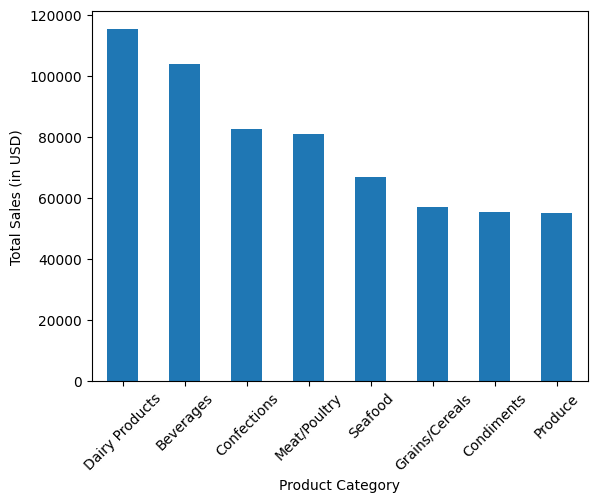

In [45]:
df_product.groupby('CategoryName')['FinalSales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel("Total Sales (in USD)")
plt.xlabel("Product Category")
plt.xticks(rotation= 45)
plt.show()

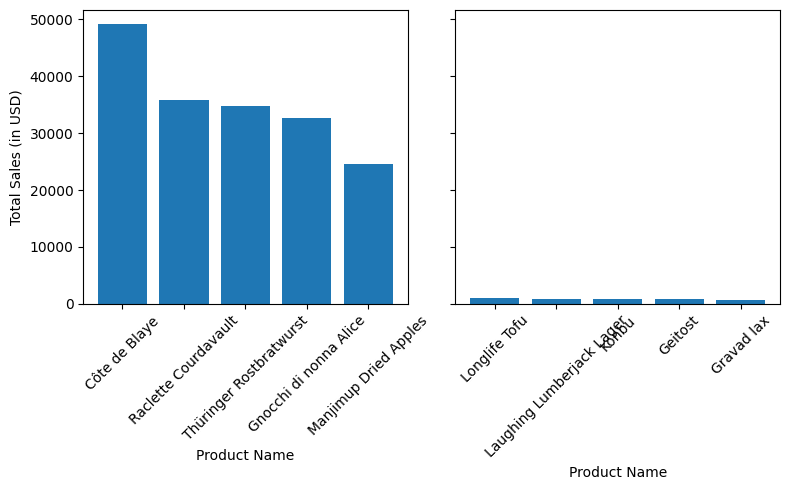

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5), sharey = True)
ax1.bar(x = df_product.groupby('ProductName')['FinalSales'].sum().sort_values(ascending=False)[0:5].index,
        height = df_product.groupby('ProductName')['FinalSales'].sum().sort_values(ascending=False)[0:5].values)
ax2.bar(x = df_product.groupby('ProductName')['FinalSales'].sum().sort_values(ascending=False)[-6:-1].index,
        height = df_product.groupby('ProductName')['FinalSales'].sum().sort_values(ascending=False)[-6:-1].values)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45)
ax1.set_ylabel("Total Sales (in USD)")
ax1.set_xlabel("Product Name")
ax2.set_xlabel("Product Name")
plt.tight_layout()
plt.show()

__Findings__ :

* Top 3 penghasil revenue bagi perusahaan kita adalah beverages, dairy products, serta confections
* secara product revenue kita lebih banyak di generate oleh Caembert Pierrot, Alice Mutton, Carnarvon Tigers, Boston Crab Meat, dan Aniseed Syrup.
* Sementara itu product-product yang kurang terbeli adalah Uncle Bob's Organic Dried Pears, Wimmers gute Semmelknodel, Vegie-Spread, Tunnbrod, dan Valkoinen Suklaa
* Untuk meningkatkan penjualan produk-produk yang ada di top 5 terbawah penghasil revenue bisa dilakukan bundling ataupun promo agar penjualannya meningkat, pun jika penjualan produk tersebut tidak dapat ditingkatkan

### How about our monthly performance in 1997?

<AxesSubplot: xlabel='OrderDate'>

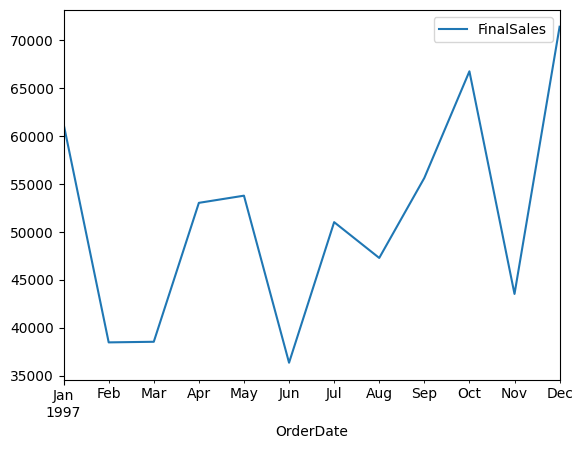

In [15]:
df_product[['OrderDate', 'FinalSales']].set_index('OrderDate').resample('1M').sum().plot()

<AxesSubplot: xlabel='OrderDate'>

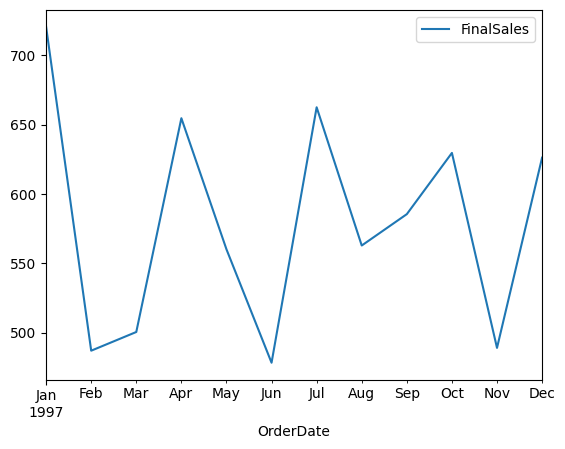

In [16]:
df_product[['OrderDate', 'FinalSales']].set_index('OrderDate').resample('1M').mean().plot()

<AxesSubplot: xlabel='OrderDate'>

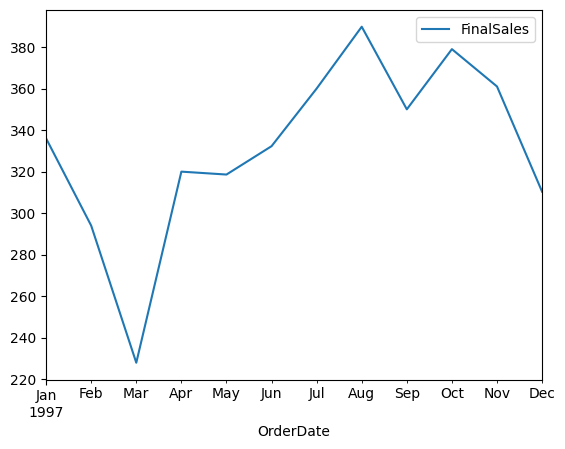

In [17]:
df_product[['OrderDate', 'FinalSales']].set_index('OrderDate').resample('1M').median().plot()

__Findings__ :

Secara sales revenue kita cenderung mengalami sedikit peningkatan, namun basket size atau pembelian rata-rata setiap orang sepertinya stagnan dari 500 s.d 600 USD per customer

### Apakah setiap negara memiliki preferensi yang sama terhadap produk?

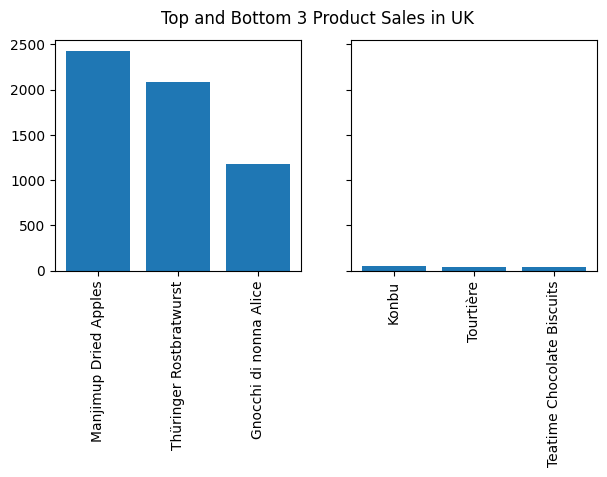

<Figure size 640x480 with 0 Axes>

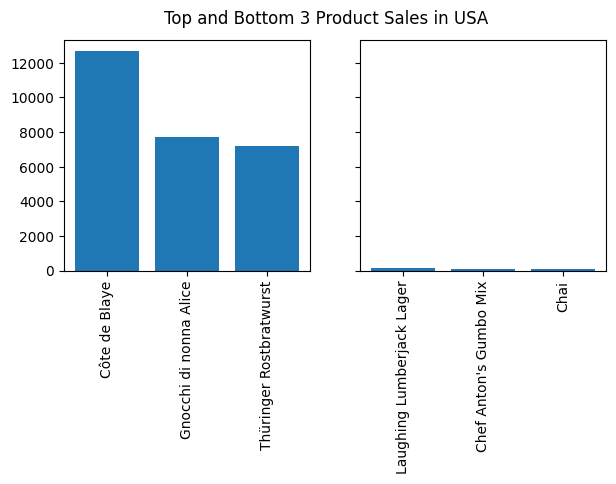

<Figure size 640x480 with 0 Axes>

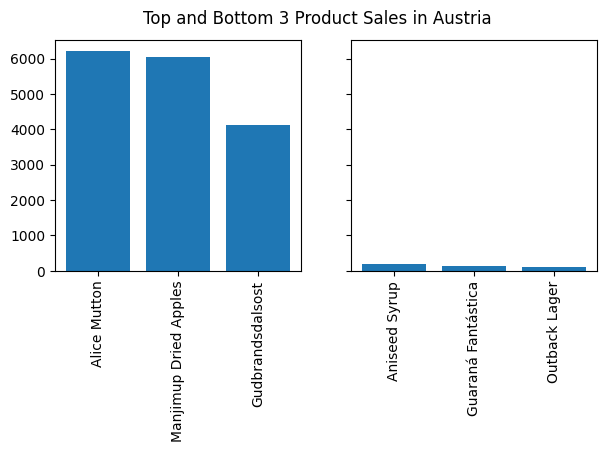

<Figure size 640x480 with 0 Axes>

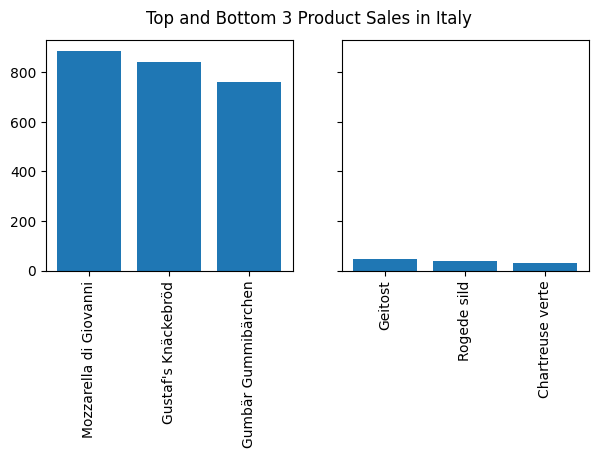

<Figure size 640x480 with 0 Axes>

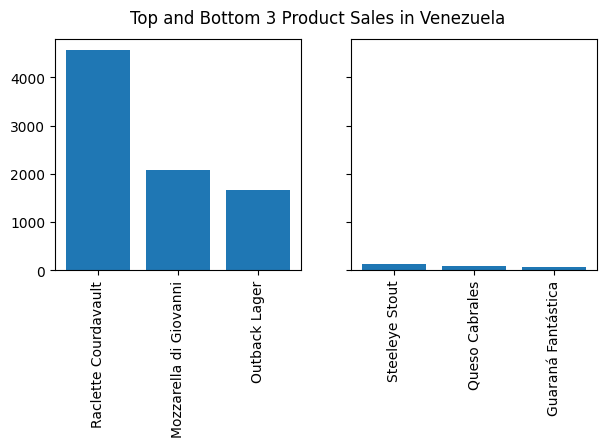

<Figure size 640x480 with 0 Axes>

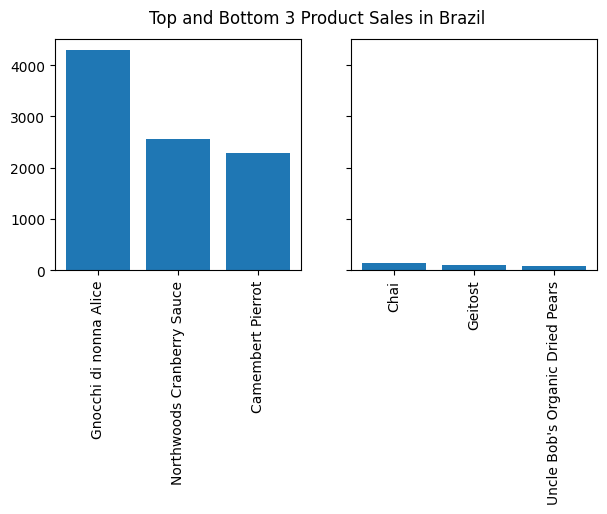

<Figure size 640x480 with 0 Axes>

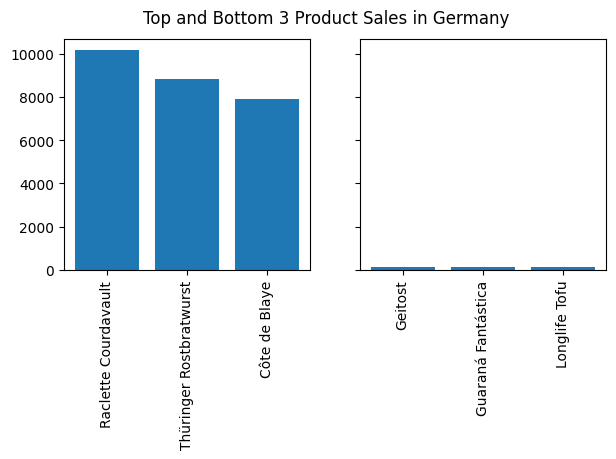

<Figure size 640x480 with 0 Axes>

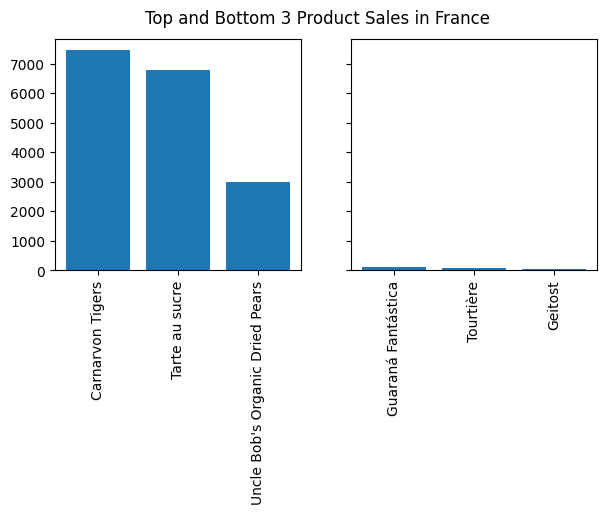

<Figure size 640x480 with 0 Axes>

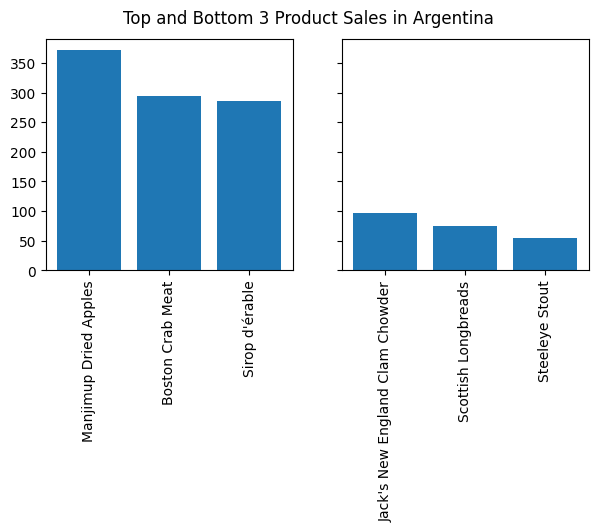

<Figure size 640x480 with 0 Axes>

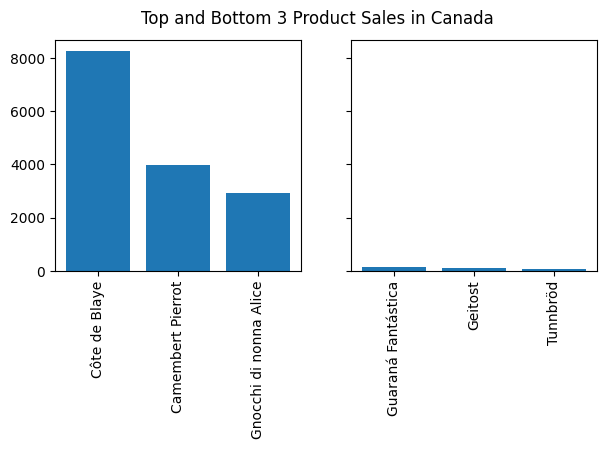

<Figure size 640x480 with 0 Axes>

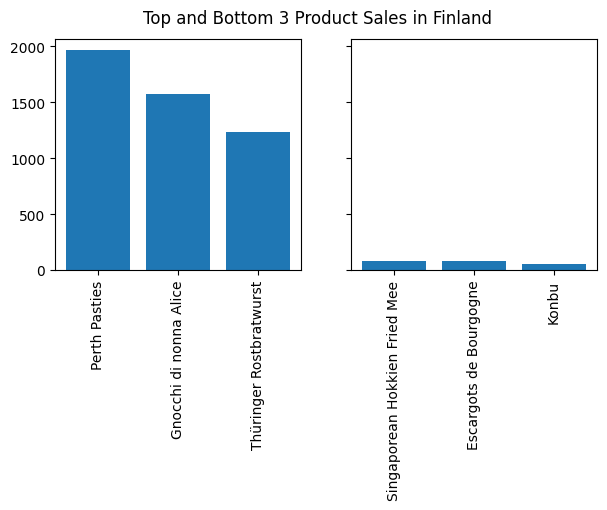

<Figure size 640x480 with 0 Axes>

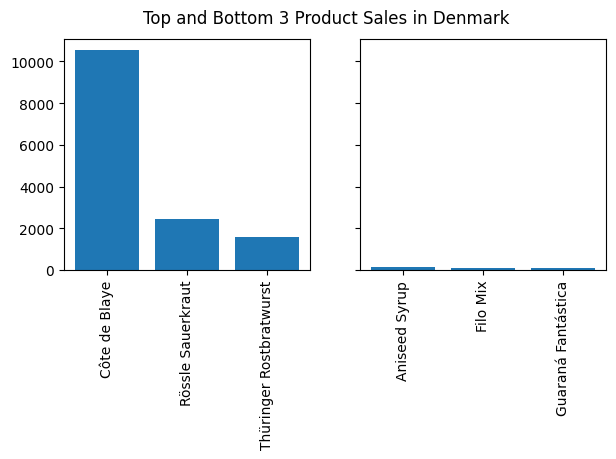

<Figure size 640x480 with 0 Axes>

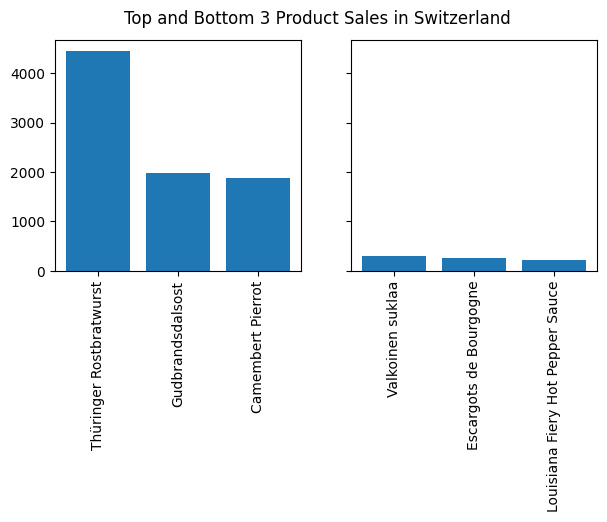

<Figure size 640x480 with 0 Axes>

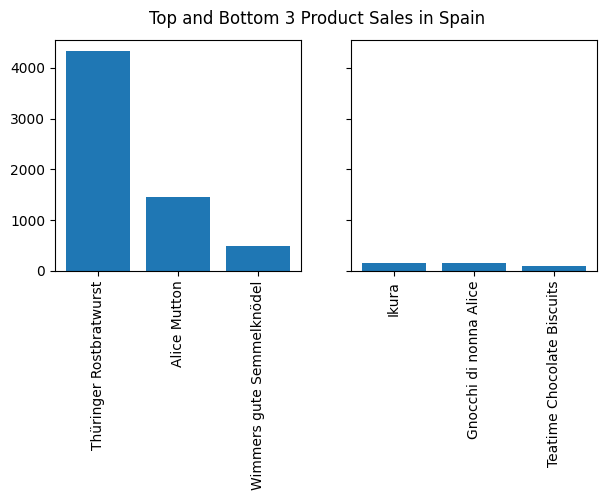

<Figure size 640x480 with 0 Axes>

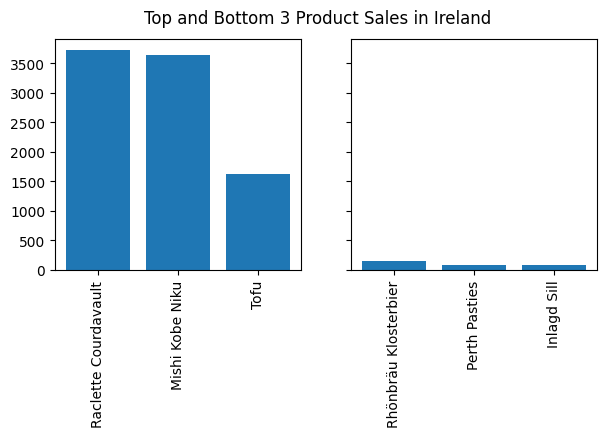

<Figure size 640x480 with 0 Axes>

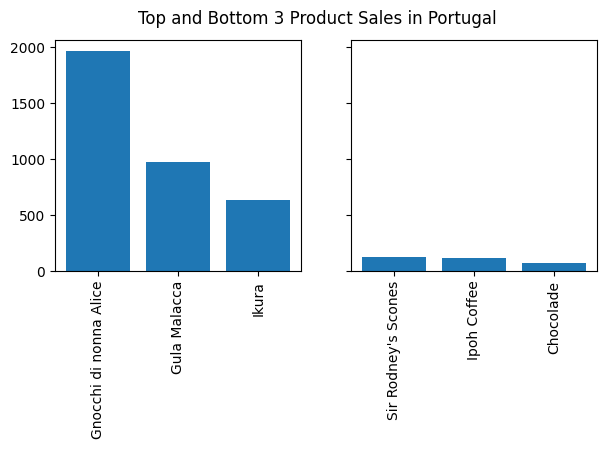

<Figure size 640x480 with 0 Axes>

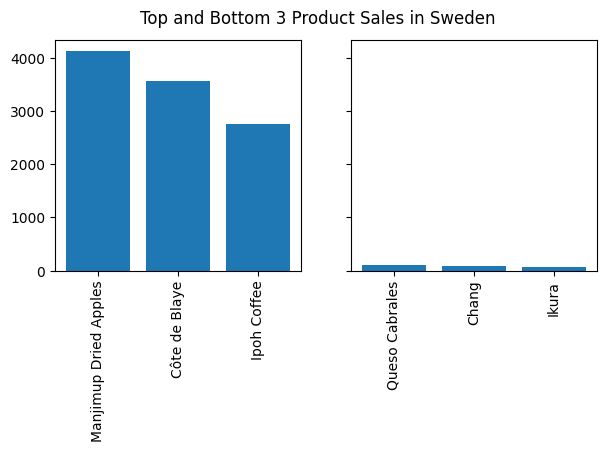

<Figure size 640x480 with 0 Axes>

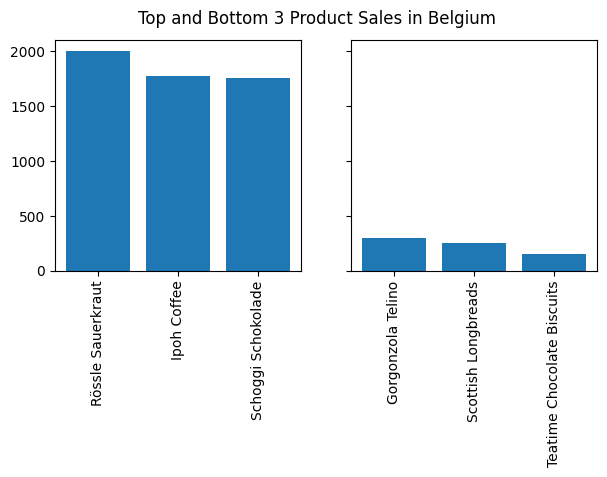

<Figure size 640x480 with 0 Axes>

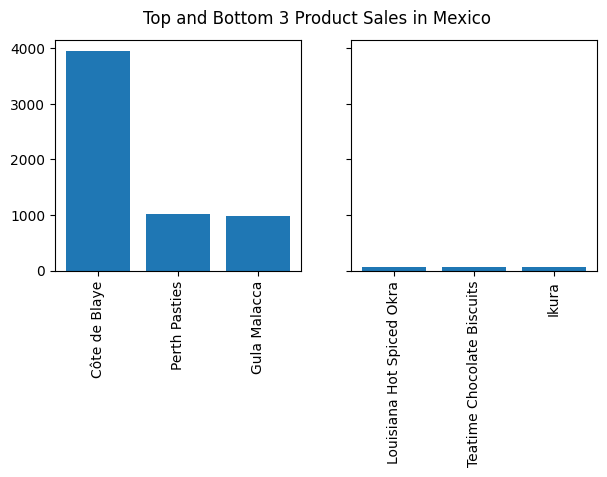

<Figure size 640x480 with 0 Axes>

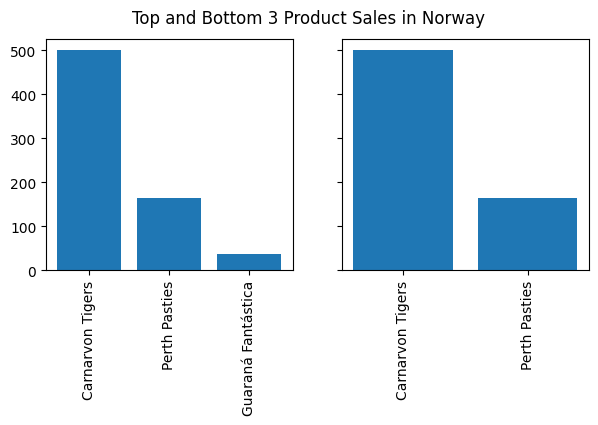

<Figure size 640x480 with 0 Axes>

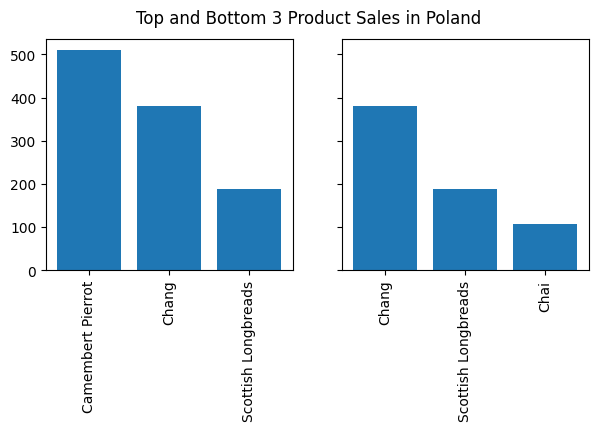

<Figure size 640x480 with 0 Axes>

In [18]:
for i in df_product.ShipCountry.unique():
      fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (7,3))
      ax1.bar(x = df_product[df_product.ShipCountry == i].groupby('ProductName')['FinalSales'].sum().sort_values(ascending=False).index[0:3],
              height = df_product[df_product.ShipCountry == i].groupby('ProductName')['FinalSales'].sum().sort_values(ascending=False).values[0:3])
      ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
      ax2.bar(x = df_product[df_product.ShipCountry == i].groupby('ProductName')['FinalSales'].sum().sort_values(ascending=False).index[-4:-1],
              height = df_product[df_product.ShipCountry == i].groupby('ProductName')['FinalSales'].sum().sort_values(ascending=False).values[-4:-1])
      ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
      plt.suptitle(f'Top and Bottom 3 Product Sales in {i}')
      plt.show()
      plt.clf()

__Findings__:

Tidak, setiap negara memiliki preferensi yang berbeda-beda terhadap produk favorit mereka, sehingga cara melakukan  bundling harus berbeda-beda setiap negara

# Customer Analysis

Pada analisis customer akan dilakukan segmentasi berdasarkan RFM (Recency, Frequency, dan Monetary)
Dengan simulasi bahwa analisis ini dilakukan pada awal tahun 1998 dan menggunakan data historis 1 tahun ke belakang (1997)

In [19]:
today = datetime(1998,1,1)

In [20]:
# Filtering analysis to focus on 1997
df_cst = df_cst[(df_cst.OrderDate >= '1997-01-01') &
                (df_cst.OrderDate < '1998-01-01')]
df_cst

,CustomerID,ContactName,Address,City,Region,PostalCode,Country,OrderID,OrderDate,ShippedDate,RequiredDate,ProductName,Quantity,UnitPrice,Discount,TotalSales,FinalSales
0,ALFKI,Maria Anders,Obere Str. 57,Berlin,None,12209,Germany,10643.0,1997-08-25,1997-09-02,1997-09-22,Chartreuse verte,21.0,18.00,0.25,378.00,283.50
1,ALFKI,Maria Anders,Obere Str. 57,Berlin,None,12209,Germany,10643.0,1997-08-25,1997-09-02,1997-09-22,Rössle Sauerkraut,15.0,45.60,0.25,684.00,513.00
2,ALFKI,Maria Anders,Obere Str. 57,Berlin,None,12209,Germany,10643.0,1997-08-25,1997-09-02,1997-09-22,Spegesild,2.0,12.00,0.25,24.00,18.00
3,ALFKI,Maria Anders,Obere Str. 57,Berlin,None,12209,Germany,10692.0,1997-10-03,1997-10-13,1997-10-31,Vegie-spread,20.0,43.90,0.00,878.00,878.00
4,ALFKI,Maria Anders,Obere Str. 57,Berlin,None,12209,Germany,10702.0,1997-10-13,1997-10-21,1997-11-24,Aniseed Syrup,6.0,10.00,0.00,60.00,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,WOLZA,Zbyszek Piestrzeniewicz,ul. Filtrowa 68,Warszawa,None,01-012,Poland,10611.0,1997-07-25,1997-08-01,1997-08-22,Chai,6.0,18.00,0.00,108.00,108.00
2145,WOLZA,Zbyszek Piestrzeniewicz,ul. Filtrowa 68,Warszawa,None,01-012,Poland,10611.0,1997-07-25,1997-08-01,1997-08-22,Chang,10.0,19.00,0.00,190.00,190.00
2146,WOLZA,Zbyszek Piestrzeniewicz,ul. Filtrowa 68,Warszawa,None,01-012,Poland,10792.0,1997-12-23,1997-12-31,1998-01-20,Chang,10.0,19.00,0.00,190.00,190.00
2147,WOLZA,Zbyszek Piestrzeniewicz,ul. Filtrowa 68,Warszawa,None,01-012,Poland,10792.0,1997-12-23,1997-12-31,1998-01-20,Scottish Longbreads,15.0,12.50,0.00,187.50,187.50


## Recency

In [21]:
recency = (today - df_cst.groupby("CustomerID").agg({"OrderDate":"max"}))

In [22]:
recency.rename(columns={'OrderDate':'Recency'}, inplace=True)

In [23]:
recency = recency["Recency"].apply(lambda x: x.days)

## Frequency

In [24]:
freq = df_cst.groupby("CustomerID").agg({"OrderID":"count"})
freq.rename(columns={'OrderID' : 'Frequency'}, inplace=True)
freq.head()

,Frequency
CustomerID,
ALFKI,6
ANATR,4
ANTON,14
AROUT,18
BERGS,27


## Monetary

In [25]:
monetary = df_cst.groupby('CustomerID').agg({'FinalSales':np.sum})
monetary.rename(columns = {'FinalSales':'Monetary'}, inplace=True)
monetary.head()

,Monetary
CustomerID,
ALFKI,2022.50
ANATR,799.75
ANTON,5960.77
AROUT,6406.90
BERGS,13849.02


## RFM Analysis

In [26]:
rfm = pd.concat([recency, freq, monetary], axis=1)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
ALFKI,80,6,2022.50
ANATR,34,4,799.75
ANTON,98,14,5960.77
AROUT,8,18,6406.90
BERGS,16,27,13849.02


Setelah dilakukan concatenate pada dataframe recency, frequency, dan monetary. Selanjutnya akan dilakukan scoring terhadap RFM menggunakan quantile dengan rentang skor 1 s.d 5 penjabaran sebagai berikut :

1. Pada kolom recency, customer dengan recency terendah (baru membeli) akan mendapat skor tertinggi.

2. Pada kolom frequency, akan dilakukan rank lowest frequency (jarang membeli) akan mendapat skor rendah, dan sebaliknya.

3. Pada kolom monetary, akan monetary terendah (spending paling rendah) akan mendapatkan skor rendah, dan sebaliknya.

In [27]:
rfm["RecencyScore"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1]) 
rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])

rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
ALFKI,80,6,2022.50,2,2,2
ANATR,34,4,799.75,3,1,1
ANTON,98,14,5960.77,2,4,4
AROUT,8,18,6406.90,5,5,4
BERGS,16,27,13849.02,4,5,5


In [28]:
rfm['RFM_SCORE'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str) 

In [29]:
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,
ALFKI,80,6,2022.50,2,2,2,222
ANATR,34,4,799.75,3,1,1,311
ANTON,98,14,5960.77,2,4,4,244
AROUT,8,18,6406.90,5,5,4,554
BERGS,16,27,13849.02,4,5,5,455


### Segmentasi 

Segmentasi akan dilakukan menggunakan recency dan frequensi dengan refensi segmentasi [Referensi Segmentasi](https://www.kaggle.com/code/serkangzel/customer-segmentation-with-rfm-analysis)

In [30]:
segmentation_mapping = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [31]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(segmentation_mapping, regex=True)
rfm

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
CustomerID,,,,,,,,
ALFKI,80,6,2022.50,2,2,2,222,Hibernating
ANATR,34,4,799.75,3,1,1,311,About to Sleep
ANTON,98,14,5960.77,2,4,4,244,At Risk
AROUT,8,18,6406.90,5,5,4,554,Champions
BERGS,16,27,13849.02,4,5,5,455,Loyal Customers
BLAUS,156,7,1079.80,1,2,1,121,Hibernating
BLONP,100,15,7817.88,2,4,4,244,At Risk
BOLID,3,2,3026.85,5,1,3,513,New Customers
BONAP,36,21,11208.37,3,5,5,355,Loyal Customers


In [60]:
fig = px.treemap(pd.DataFrame(rfm['Segment'].value_counts().reset_index()), 
                 path=['index'],
                 values='Segment', width=800, height=400)
fig.update_layout(
    treemapcolorway =['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'],
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<AxesSubplot: xlabel='Segment'>

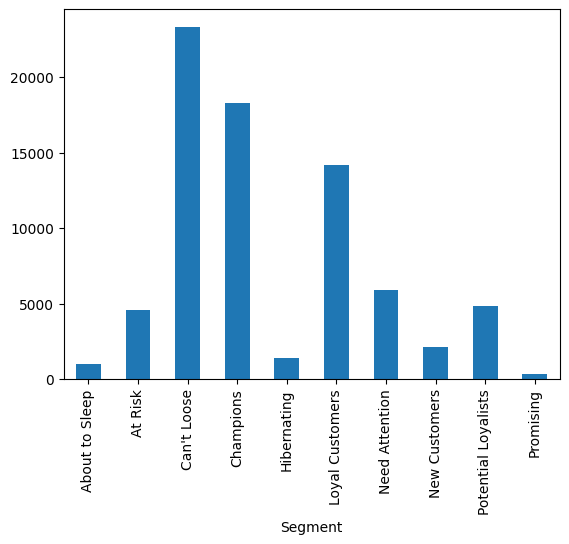

In [63]:
rfm.groupby(['Segment'])['Monetary'].mean().plot(kind='bar')

In [64]:
rfm.groupby(['Segment'])['Monetary'].mean()

Segment
About to Sleep          1001.550000
At Risk                 4572.370000
Can't Loose            23332.320000
Champions              18278.917000
Hibernating             1405.535000
Loyal Customers        14167.065882
Need Attention          5906.700000
New Customers           2134.083333
Potential Loyalists     4810.142500
Promising                312.750000
Name: Monetary, dtype: float64

__Findings__:

*

# Cohort Analysis

Setelah diketahui bahwa sebagian besar konsumen kita berada pada segmentasi Hibernating dan At Risk maka perlu dilakukan analisis lebih jauh menggunakan cohort analisis untuk retention rate dar customer-customer tersebut

In [33]:
df_cst['OrderMth'] =  df_cst['OrderDate'].dt.to_period('M')

In [34]:
df_cst.head()

,CustomerID,ContactName,Address,City,Region,PostalCode,Country,OrderID,OrderDate,ShippedDate,RequiredDate,ProductName,Quantity,UnitPrice,Discount,TotalSales,FinalSales,OrderMth
0,ALFKI,Maria Anders,Obere Str. 57,Berlin,None,12209,Germany,10643.0,1997-08-25,1997-09-02,1997-09-22,Chartreuse verte,21.0,18.0,0.25,378.0,283.5,1997-08
1,ALFKI,Maria Anders,Obere Str. 57,Berlin,None,12209,Germany,10643.0,1997-08-25,1997-09-02,1997-09-22,Rössle Sauerkraut,15.0,45.6,0.25,684.0,513.0,1997-08
2,ALFKI,Maria Anders,Obere Str. 57,Berlin,None,12209,Germany,10643.0,1997-08-25,1997-09-02,1997-09-22,Spegesild,2.0,12.0,0.25,24.0,18.0,1997-08
3,ALFKI,Maria Anders,Obere Str. 57,Berlin,None,12209,Germany,10692.0,1997-10-03,1997-10-13,1997-10-31,Vegie-spread,20.0,43.9,0.00,878.0,878.0,1997-10
4,ALFKI,Maria Anders,Obere Str. 57,Berlin,None,12209,Germany,10702.0,1997-10-13,1997-10-21,1997-11-24,Aniseed Syrup,6.0,10.0,0.00,60.0,60.0,1997-10


In [35]:
df_cst['cohort'] = df_cst.groupby('CustomerID')['OrderDate'].transform('min').dt.to_period('M')

In [36]:
df_cohort = df_cst.groupby(['cohort', 'OrderMth']).agg(n_customers=('CustomerID', 'nunique')).reset_index(drop=False)

df_cohort.head()

,cohort,OrderMth,n_customers
0,1997-01,1997-01,27
1,1997-01,1997-02,6
2,1997-01,1997-03,6
3,1997-01,1997-04,8
4,1997-01,1997-05,7


In [37]:
df_cohort.head()

,cohort,OrderMth,n_customers
0,1997-01,1997-01,27
1,1997-01,1997-02,6
2,1997-01,1997-03,6
3,1997-01,1997-04,8
4,1997-01,1997-05,7


In [38]:
df_cohort['period_number'] = (df_cohort['OrderMth'] - df_cohort['cohort']).apply(attrgetter('n'))

In [39]:
pivot = cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number', values='n_customers')

pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
1997-01,27.0,6.0,6.0,8.0,7.0,10.0,10.0,13.0,11.0,10.0,14.0,14.0
1997-02,15.0,6.0,3.0,6.0,6.0,3.0,5.0,4.0,7.0,3.0,7.0,NaN
1997-03,12.0,5.0,6.0,2.0,5.0,3.0,4.0,5.0,4.0,5.0,NaN,NaN
1997-04,11.0,2.0,4.0,3.0,3.0,3.0,NaN,2.0,2.0,NaN,NaN,NaN
1997-05,5.0,NaN,1.0,3.0,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN
1997-06,3.0,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1997-07,3.0,NaN,2.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1997-08,3.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualize cohort pivot

In [40]:
cohort_size = cohort_pivot.iloc[:, 0]

In [41]:
retention = cohort_pivot.divide(cohort_size, axis=0)

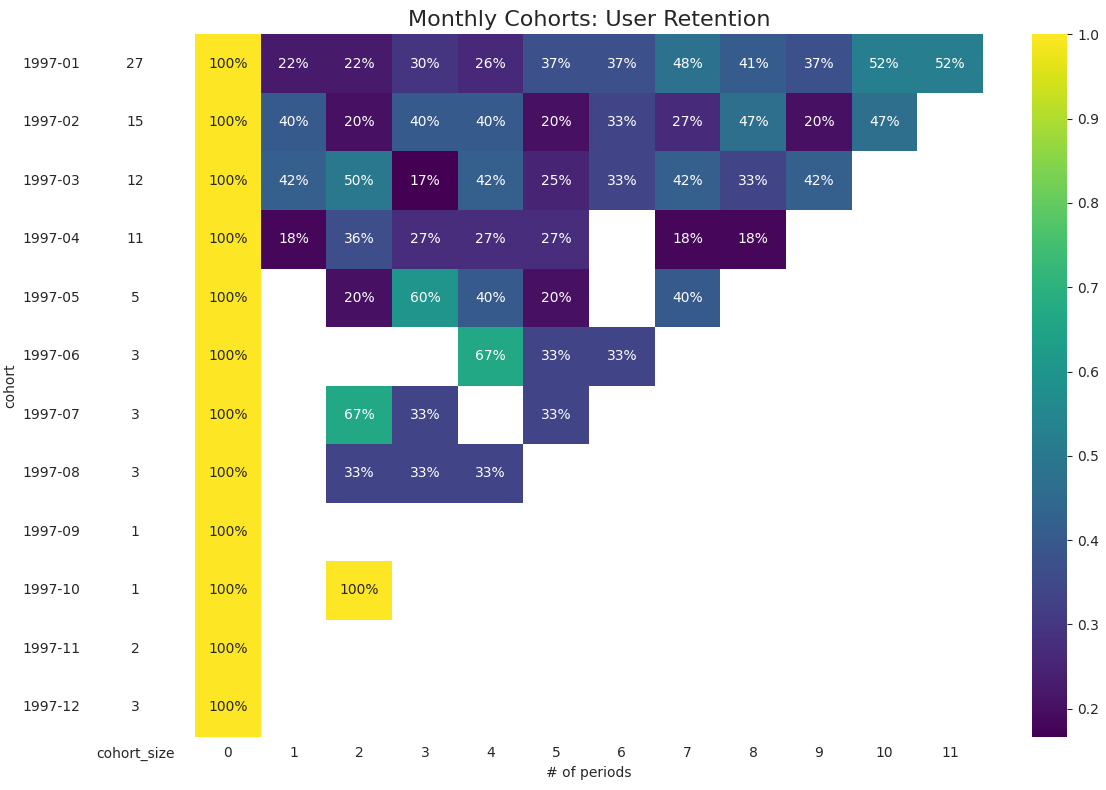

In [42]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention, 
                mask=retention.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='viridis', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(colors = ['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])
    ax[0].set_yticklabels(pivot.index, rotation = 0)
    
    fig.tight_layout()

__Findings__

*